<a href="https://colab.research.google.com/github/Jabendah/C7082-Assessment/blob/main/Object_Detection_Farm_Animals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MACHINE LEARNING AND ARTIFICIAL INTELIGENCE (C7082)**
##**Farm Animal Detection using YOLOv5**
**BY: JABEN PETER DARINYAN BAKO (213221)**

**1. BACKGROUND**

As Artificial Intelligence and Deep Learning models continue to advance, the field of Zoology also has great potential for innovation. The goal of
this work is to be able to develop an image classification model utilizing YOLOv5 that can distinguish between 8 different classes of farm animals.
Based on my interest in the field and on the subject of AI and machine learning, using technology to quickly and accurately detect selected farm
animals is the primary aim of this work. As a result, after reading and analyzing the works of many authors, Yolov5 Algorithm is a tool that can
quickly and effectively detect objects of interest, saving time and labor.

**2. MOTIVATIONS**

This work is broadly aimed at using YOLOv5 to detect some selected Farm Animals with key consideration on the speed of the model and
accuracy level, more specifically;
i. Training and testing the model accuracy using the coco128 model framework with 30 epochs and 16 batches.
ii. Training and testing with 50 epochs and a reduced batch of 10,
iii. Training and testing model with 70 epochs and 10 batches

**3. METHODS**

**Source of Data:**

The data used in this analysis was curated from mainly google. A total of 480 pictures were downloaded and split into the following eight training
(8) classes;
1. Bear = 50
2. Cattle = 50
3. Cat = 50
4. Chicken = 50
5. Dog = 50
6. Elephant = 50
7. Person = 50
8. Pig = 50

The remaining 80 images were 10 pictures each representing the 8 classes used for the test.

**Data Analysis:**

YOLO an acronym for ‘You only look once’, is an object detection algorithm that divides images into a grid system. Each cell in the grid is
responsible for detecting objects within itself. Ultralytics’ YOLOv5 (“You Only Look Once”) model family enables real-time object detection with
convolutional neural networks.

# Step 1: Install Requirements

In [1]:
# Mountiing my drive to google
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# checking presenting working directory
!pwd

/content


In [3]:
# clone YOLOv5 from github
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14995, done.
remote: Total 14995 (delta 0), reused 0 (delta 0), pack-reused 14995
Receiving objects: 100% (14995/14995), 14.07 MiB | 8.30 MiB/s, done.
Resolving deltas: 100% (10286/10286), done.


In [4]:
# change pwd to 'yolov5'
import os
os.chdir('yolov5')

In [5]:
%pip install opencv-python-headless
%pip install -qr requirements.txt
%pip install -q roboflow

import torch

from IPython.display import Image, clear_output

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

# Some warnings okay as of 2022-01-28

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 KB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.9 MB/s eta 0:00:00
Setup complete. Using torch 1.13.0+cu116 (Tesla T4)


# Step 2: Train Our Custom YOLOv5 model

Here, we are able to pass a number of arguments:
- **img:** define input image size
- **--rect** ONLY use is images are rectangle
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** Our dataset locaiton is saved in the `dataset.location`
- **weights:** specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint.
- **cache:** cache images for faster training

In [6]:
# Clone Georgina's repo
!git clone https://github.com/georginaanna/Implementing-YOLOv5

Cloning into 'Implementing-YOLOv5'...
remote: Enumerating objects: 463, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 463 (delta 16), reused 17 (delta 9), pack-reused 429
Receiving objects: 100% (463/463), 55.90 MiB | 16.85 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [7]:
# training the coco128 dataset and change from the yaml the path to the training data to /content/yolov5/Implementing-YOLOv5/coco128
!python train.py --img 416 --batch 16 --epochs 30 --data /content/yolov5/Implementing-YOLOv5/yolo-files/coco128.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/Implementing-YOLOv5/yolo-files/coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-71-gc442a2e Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_

# Step 3: test test test
Now test your model on some test images.

In [8]:
# make the "exp" from the trained model to test 
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source /content/yolov5/Implementing-YOLOv5/coco128/test

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/yolov5/Implementing-YOLOv5/coco128/test, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-71-gc442a2e Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/4 /content/yolov5/Implementing-YOLOv5/coco128/test/Cthulhu_and_R'lyeh.jpg: 416x320 1 zebra, 12.8ms
image 2/4 /content/yolov5/Implementing-YOLOv5/coco128/test/test1.jpg: 288x416 1 bear, 13.0ms
image 3/4 /content/yolov5/Implementing-YOLOv5/coco128/test/test2.jpg: 288x416 1 elephant, 8.8ms
image 4/4 /content/yolo

**4 TRAIN MY MODEL**

Dowmload my data from roboflow and train

In [9]:
# my data
!pip install roboflow

 
from roboflow import Roboflow
rf = Roboflow(api_key="Brd3ELP5PCWCmywMoJzI")
project = rf.workspace("213221").project("21322100")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to 21322100-1 in yolov5pytorch:: 100%|██████████| 969/969 [00:00<00:00, 1971.60it/s]


# Step 5: Train my model
Using 30 epochs and 16 batches as to compare with the coco128

In [15]:
# displaying graphs for inference
from IPython.display import Image, display

In [10]:
# Training path 
!python train.py --img 416 --batch 16 --epochs 30 --data /content/yolov5/21322100-1/data.yaml --weights yolov5s.pt --cache


train: weights=yolov5s.pt, cfg=, data=/content/yolov5/21322100-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-71-gc442a2e Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015,

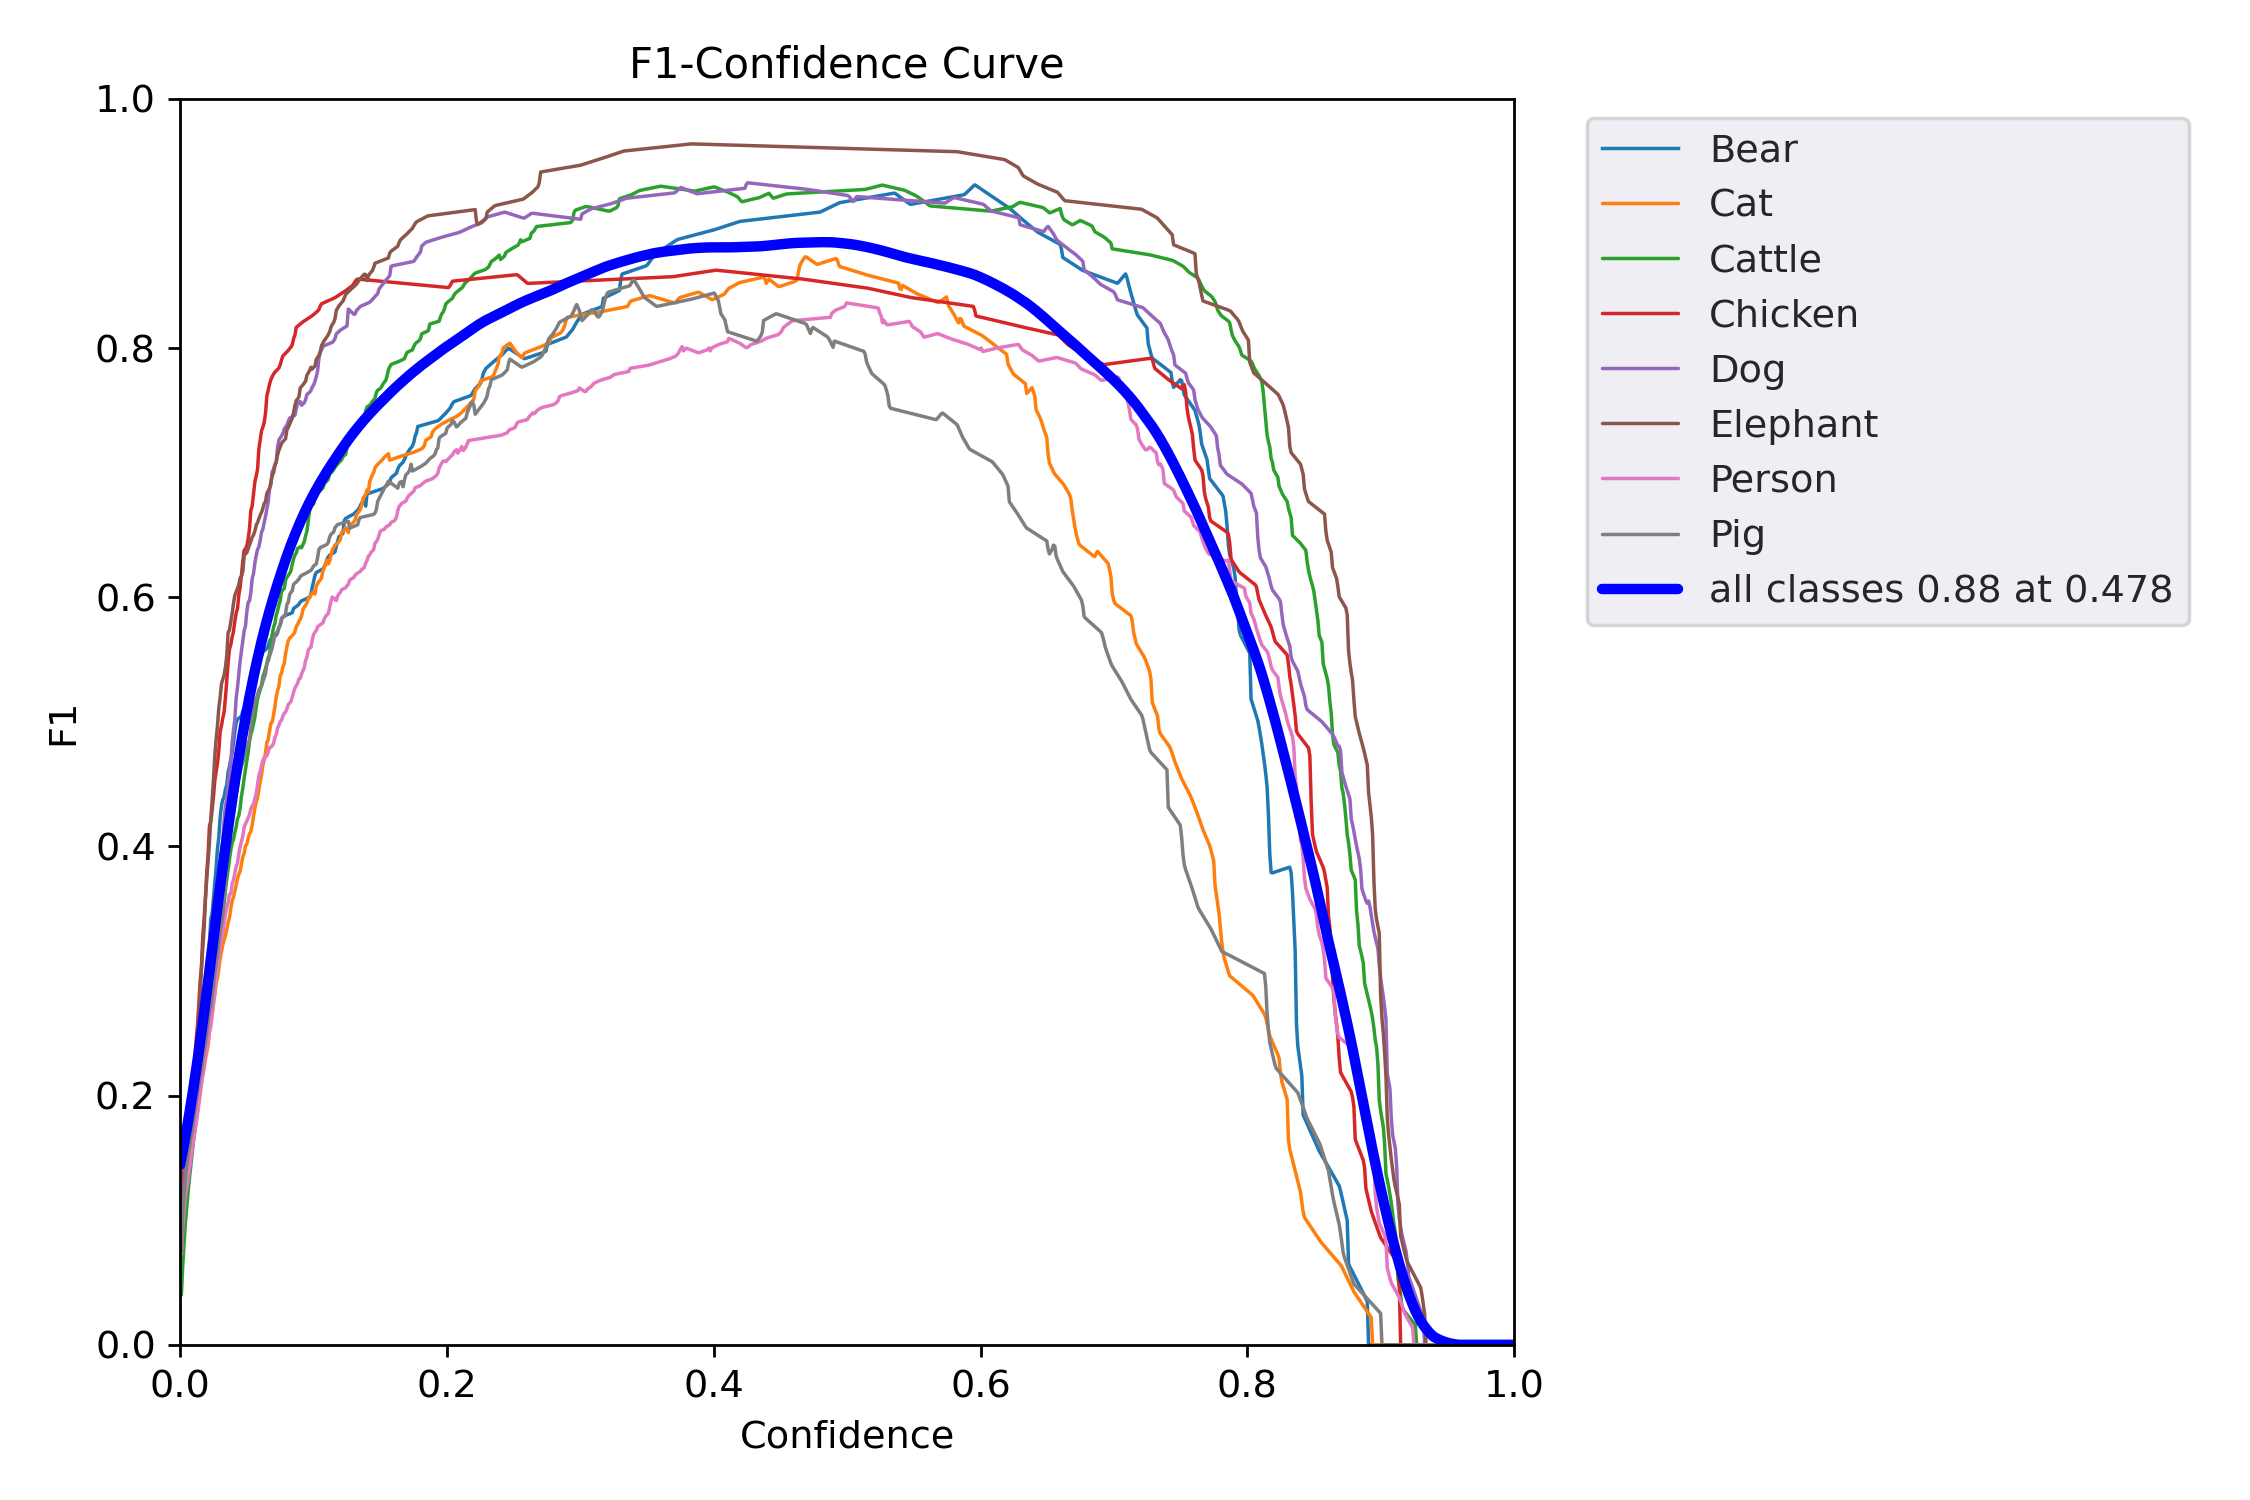

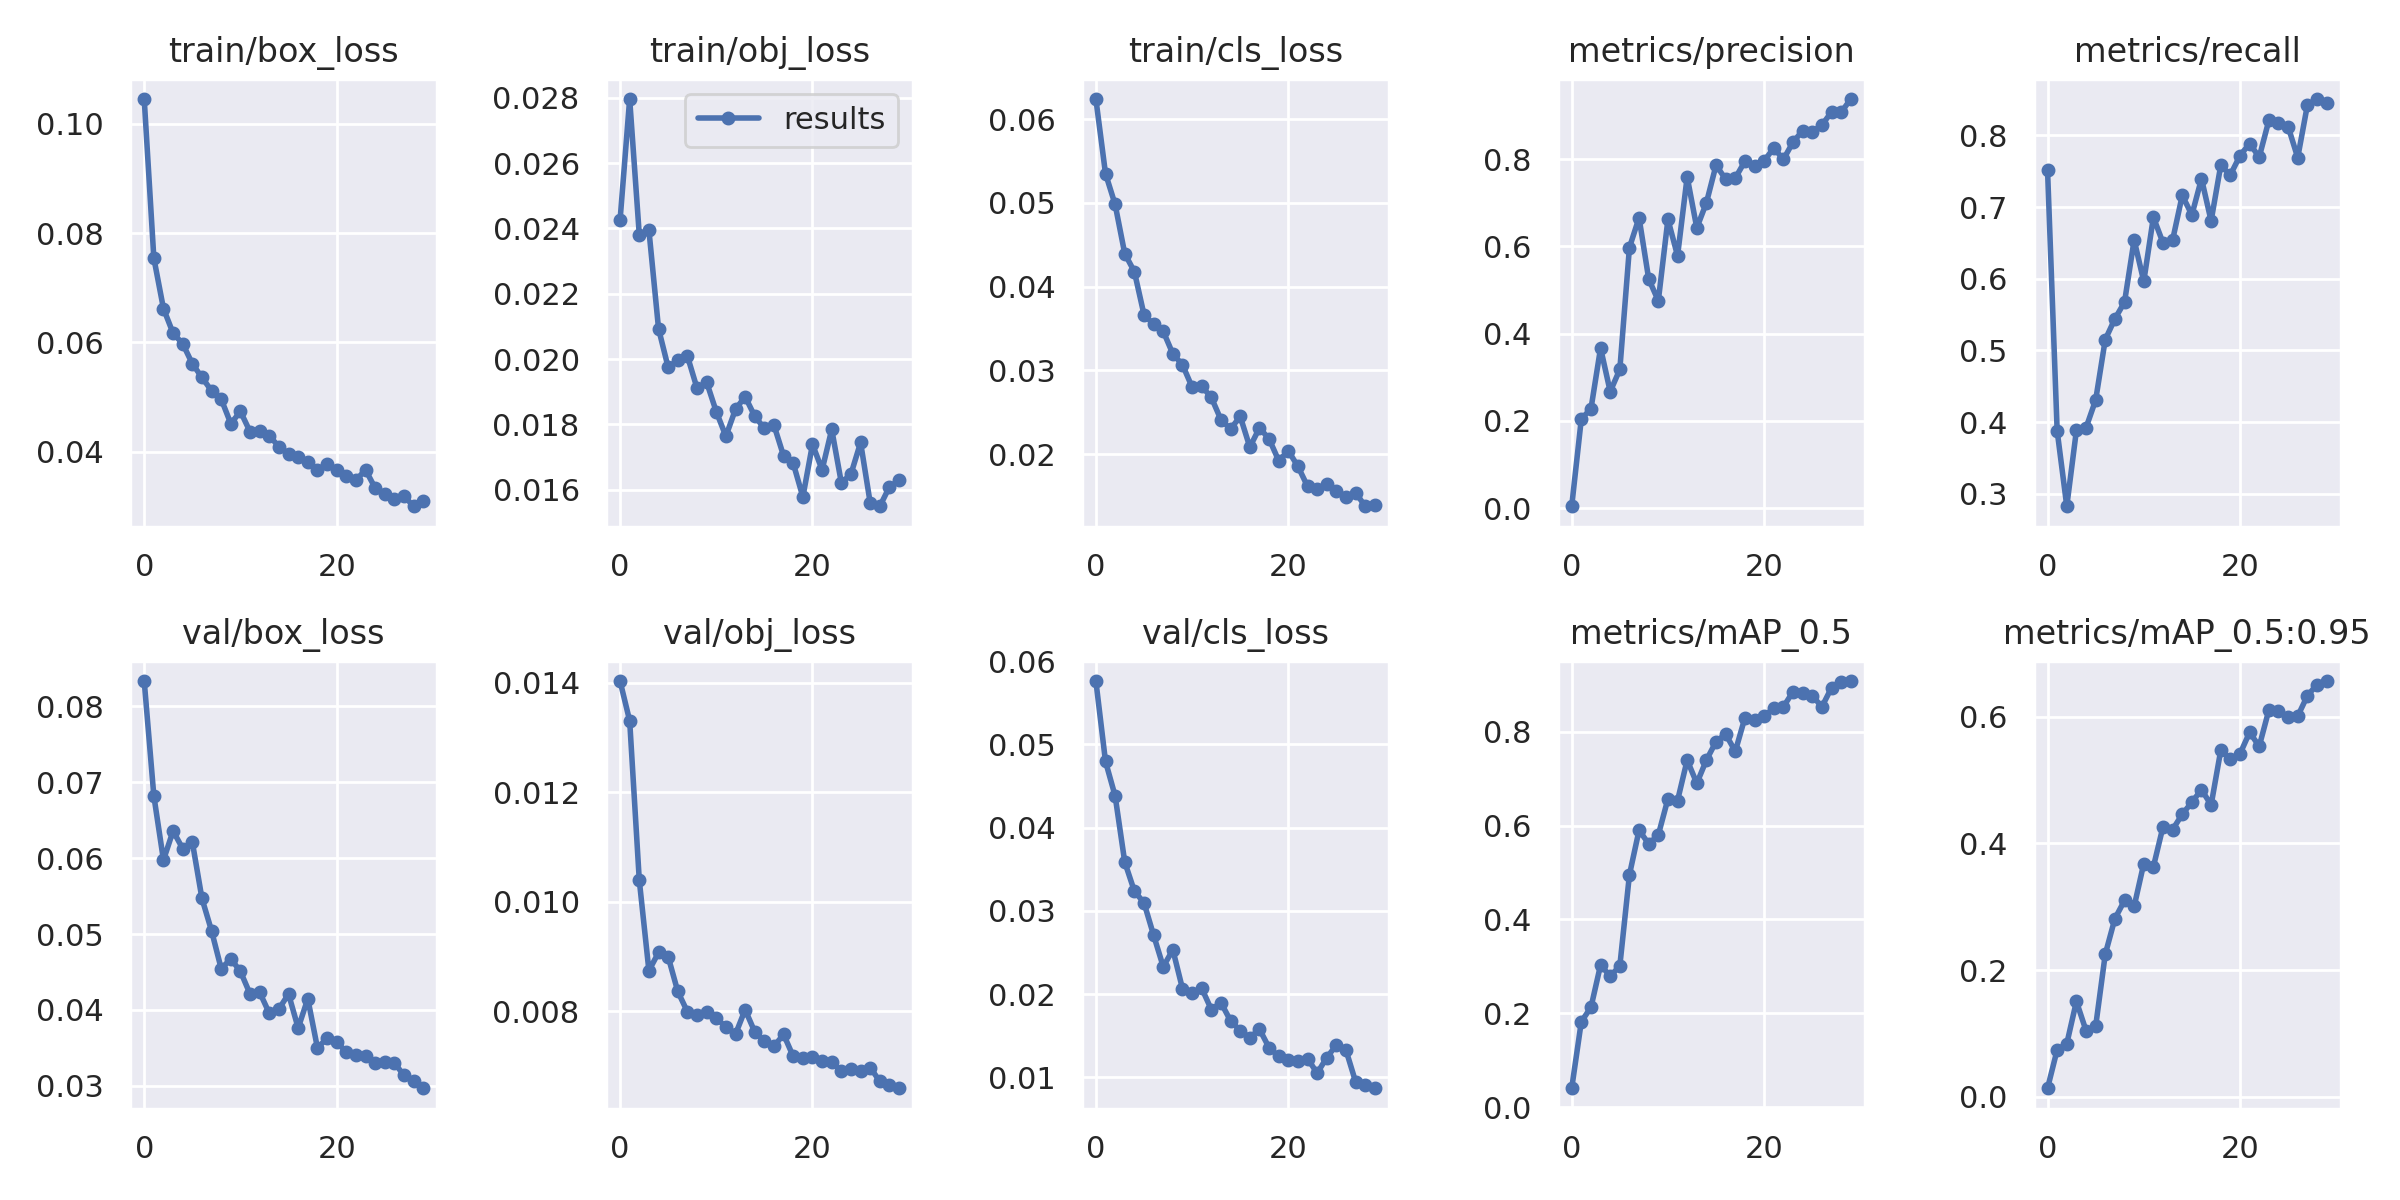

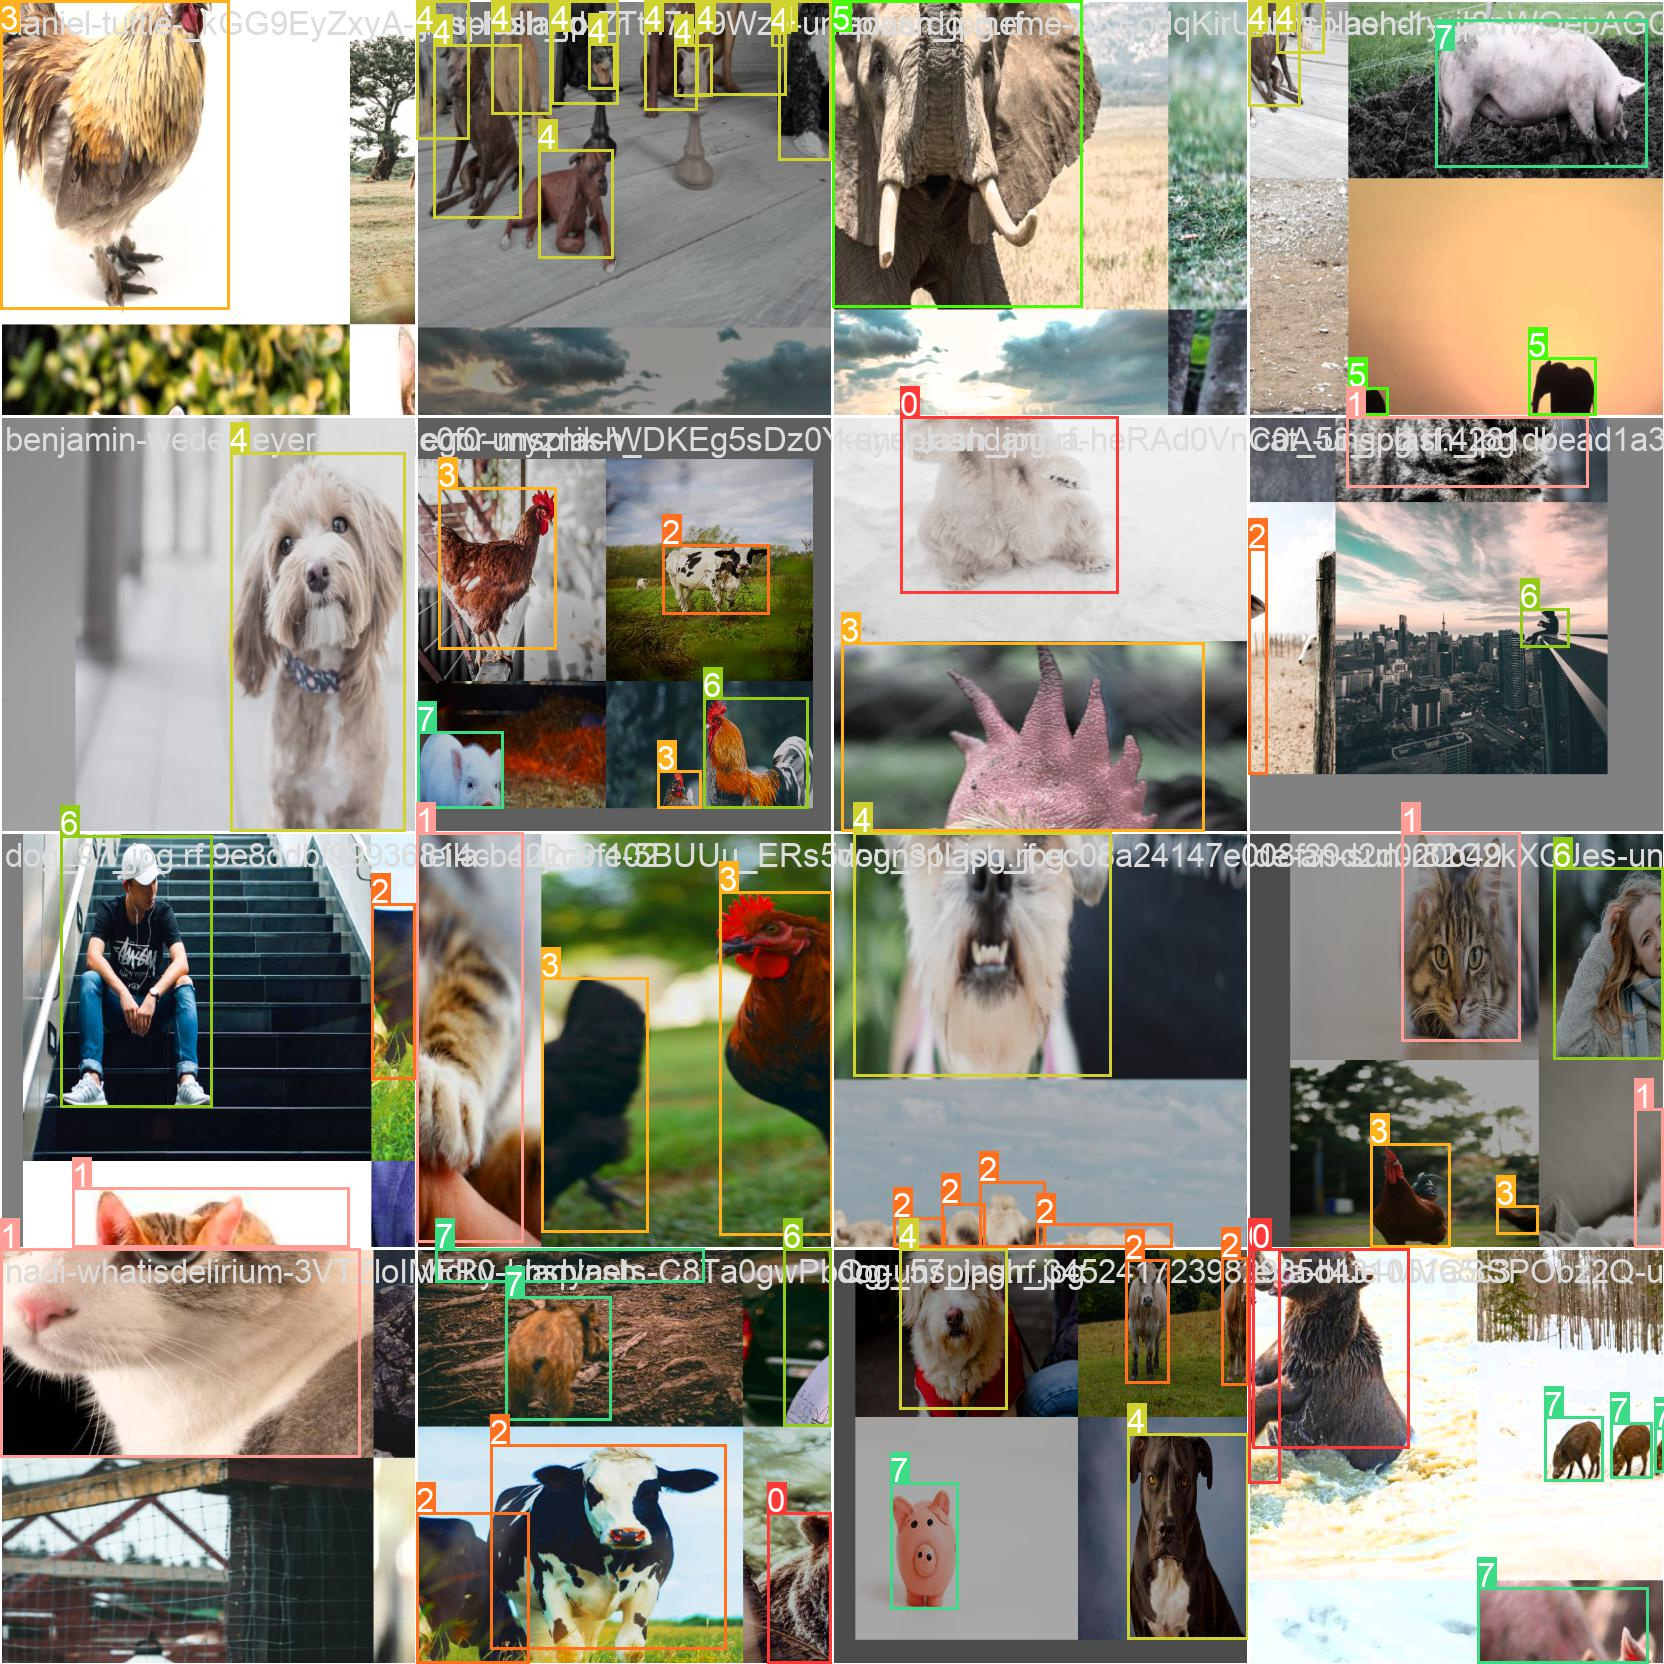

In [18]:
# Display Train 2 inference
display(Image('/content/yolov5/runs/train/exp2/F1_curve.png'))
display(Image('/content/yolov5/runs/train/exp2/results.png'))
display(Image('//content/yolov5/runs/train/exp2/train_batch0.jpg'))

COMMENT

Took 4 minuates to complete the training

mAP = 0.90

Recall = 0.84

Precision = 0.93 


# Step 6: Test 1
Test the model with the test folder on my 21322100-1 dataset

In [11]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 416 --conf 0.1 --source /content/yolov5/21322100-1/test/images

detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/yolov5/21322100-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-71-gc442a2e Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
image 1/80 /content/yolov5/21322100-1/test/images/20221023_140514_jpg.rf.8b5bf371e23b3fe491ce05f48b662d27.jpg: 416x416 3 Persons, 8.5ms
image 2/80 /content/yolov5/21322100-1/test/images/alexander-krivitskiy-tSX6E9UextA-unsplash_jpg.rf.cf87c8c0f5d7066f99d4f3a0d0bb48ae.jpg: 416x416 1 Person, 8.5ms
image 3/80 /content/yolov5/2132

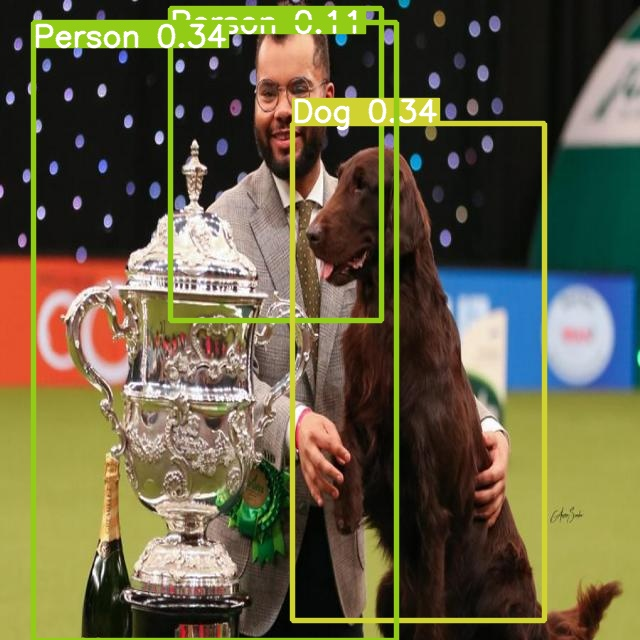

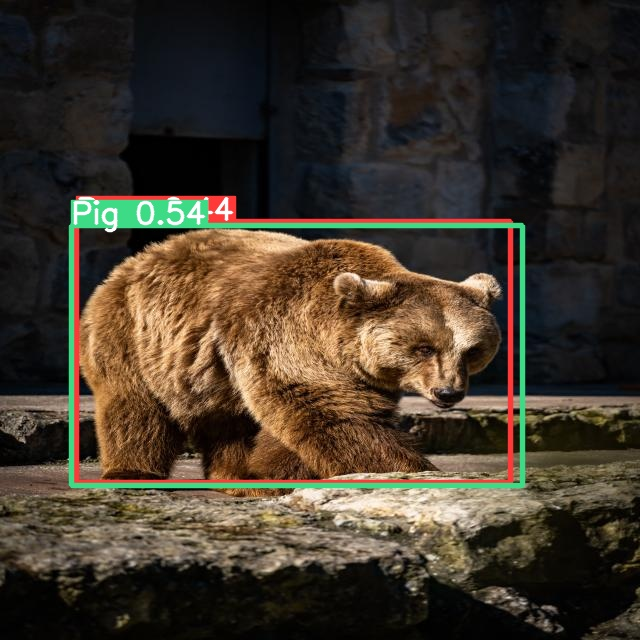

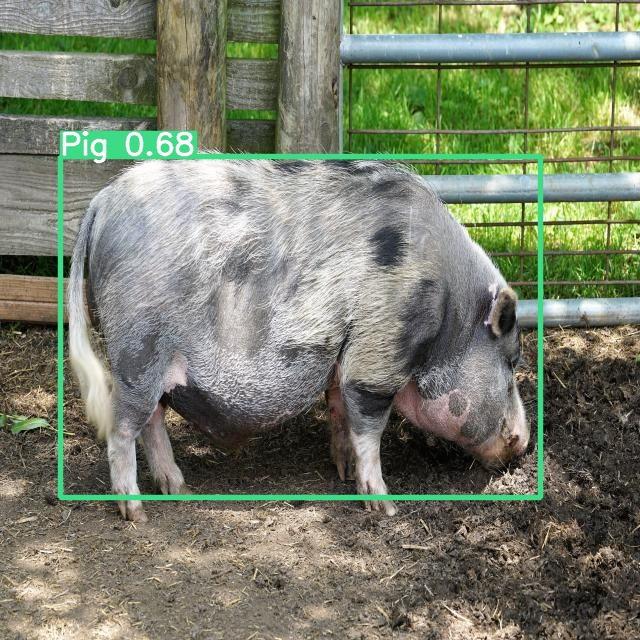

In [24]:
# Display Test 1 inference
display(Image('//content/yolov5/runs/detect/exp2/dog_54_jpg.rf.1b3a36fc8f1cef43cbfb1ebcfae0b392.jpg'))
display(Image('/content/yolov5/runs/detect/exp2/sinval-carvalho-jTnSTGeXvNs-unsplash_jpg.rf.2a61b4c6784e6af5278e5cfbb04ce5f6.jpg'))
display(Image('/content/yolov5/runs/detect/exp2/vito-natale-avMIDf1WPCg-unsplash_jpg.rf.7a7c9682ca2533f20e353c4168c72f95.jpg'))

**Comments:**

Image were correctly detected with an insignificant misclassification noticed

# Step 7: Train 2
changing the epochs to number 50 and reducing the batch size to 10

In [12]:
!python train.py --img 416 --batch 10 --epochs 50 --data /content/yolov5/21322100-1/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/21322100-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=10, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-71-gc442a2e Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015,

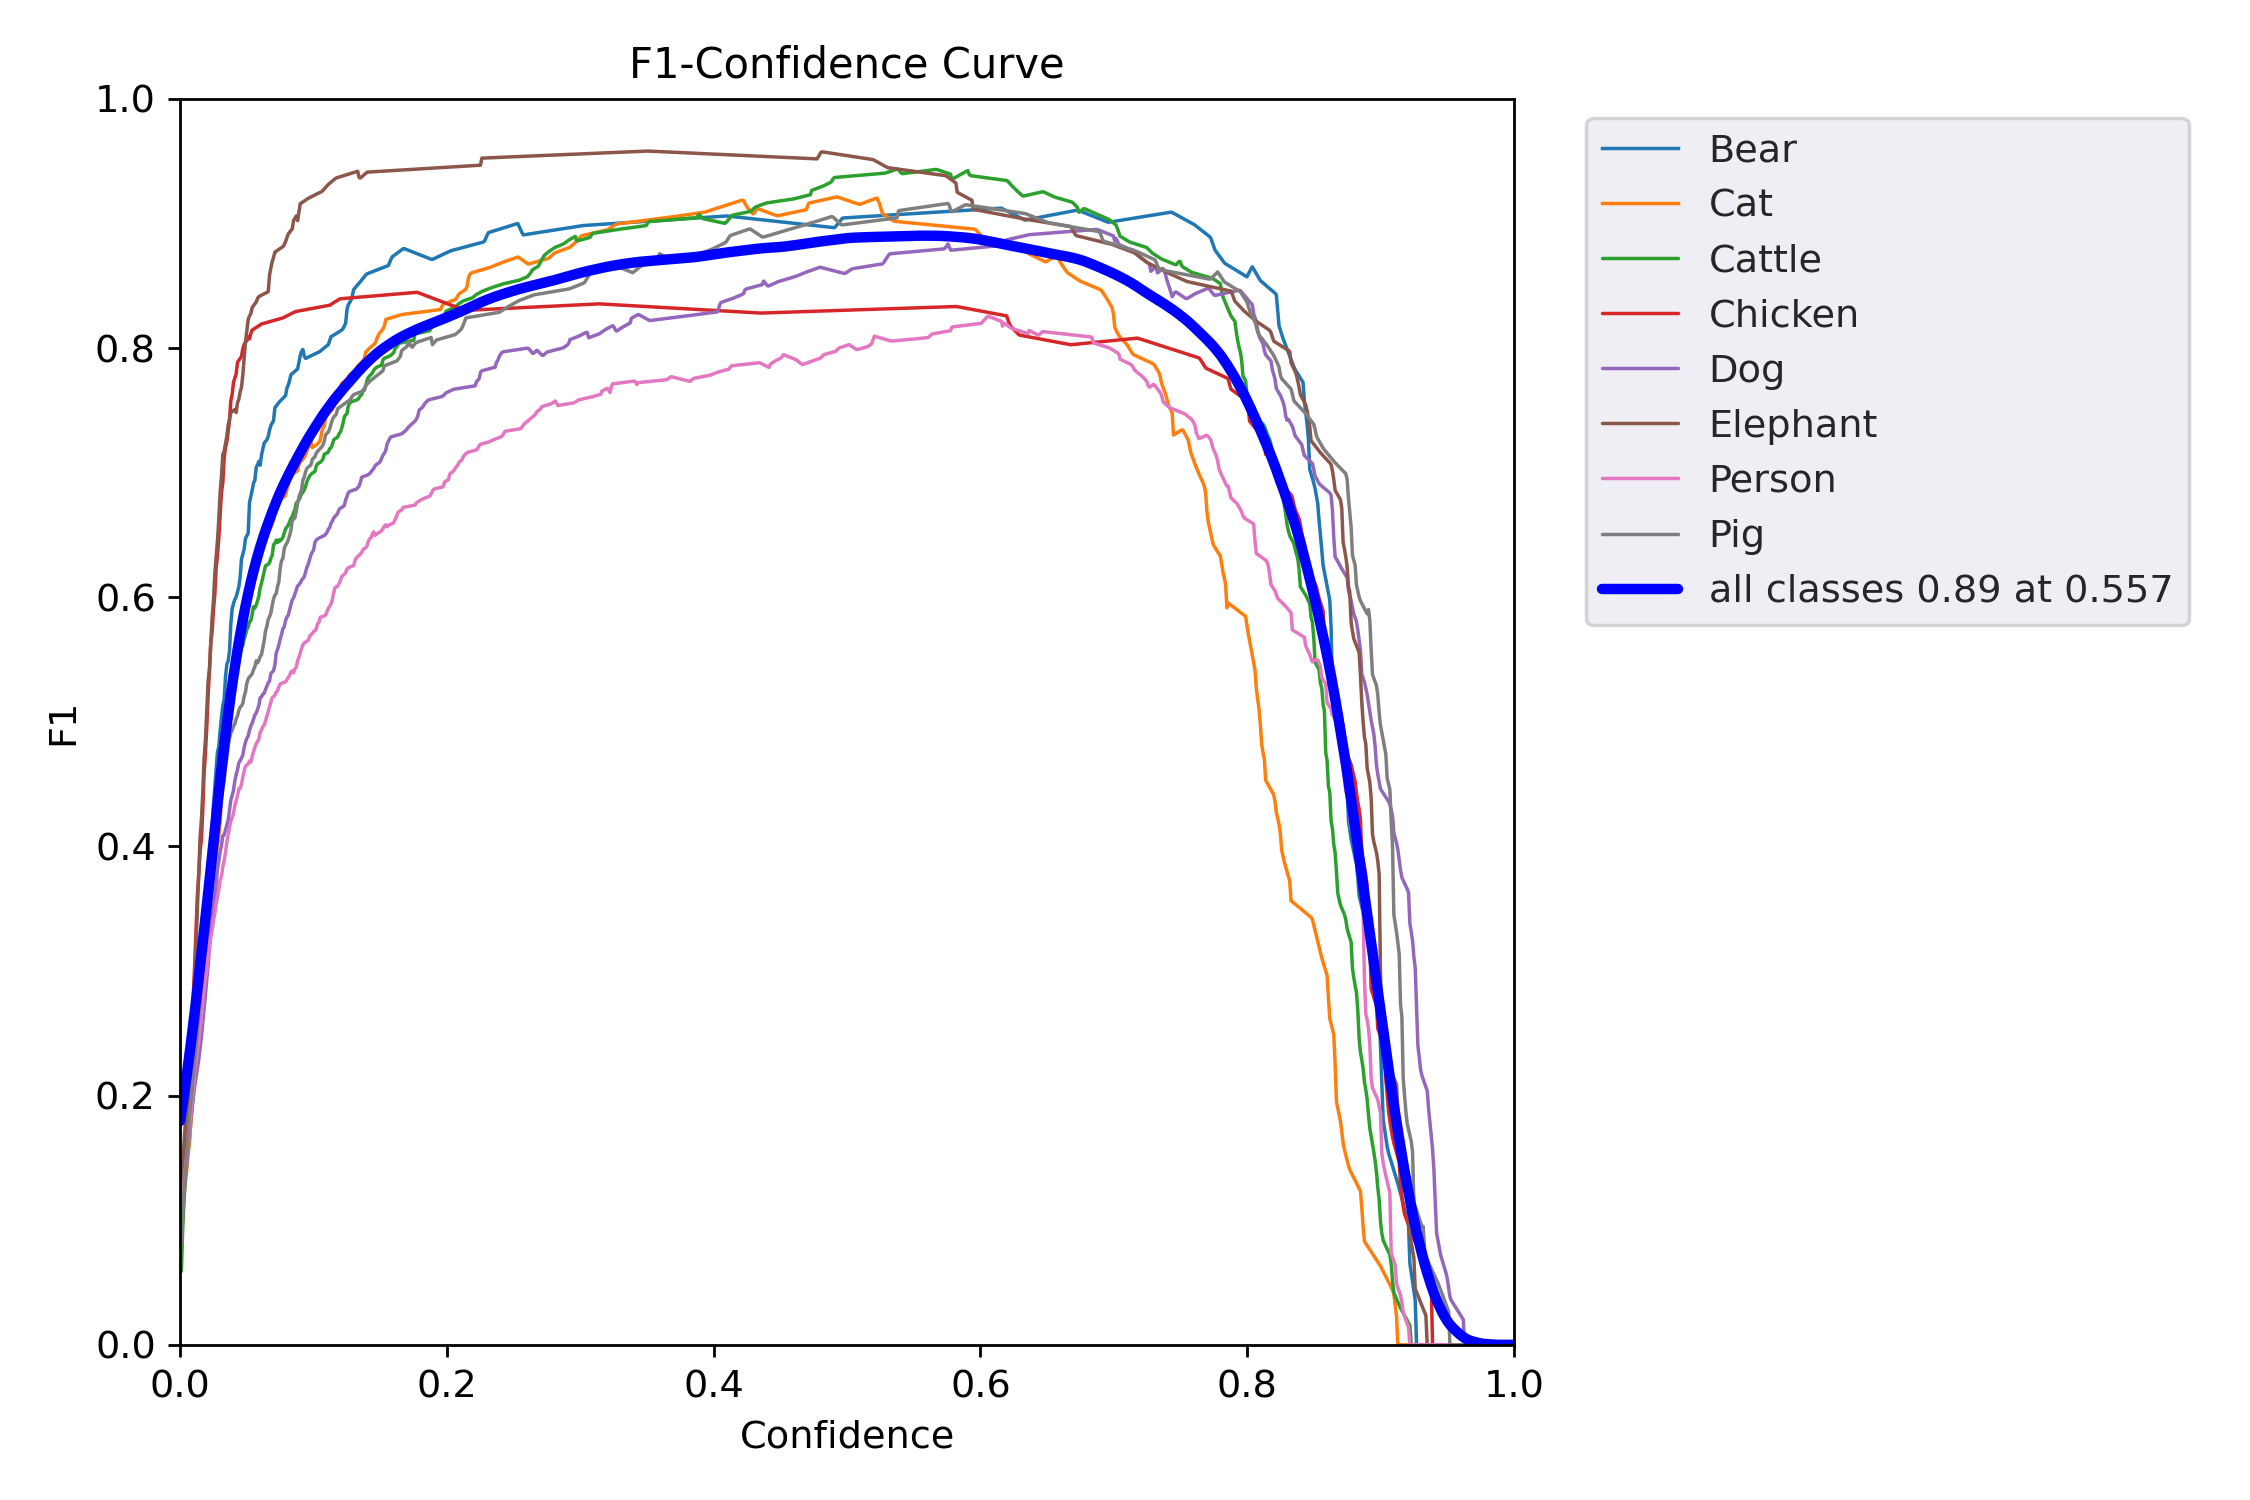

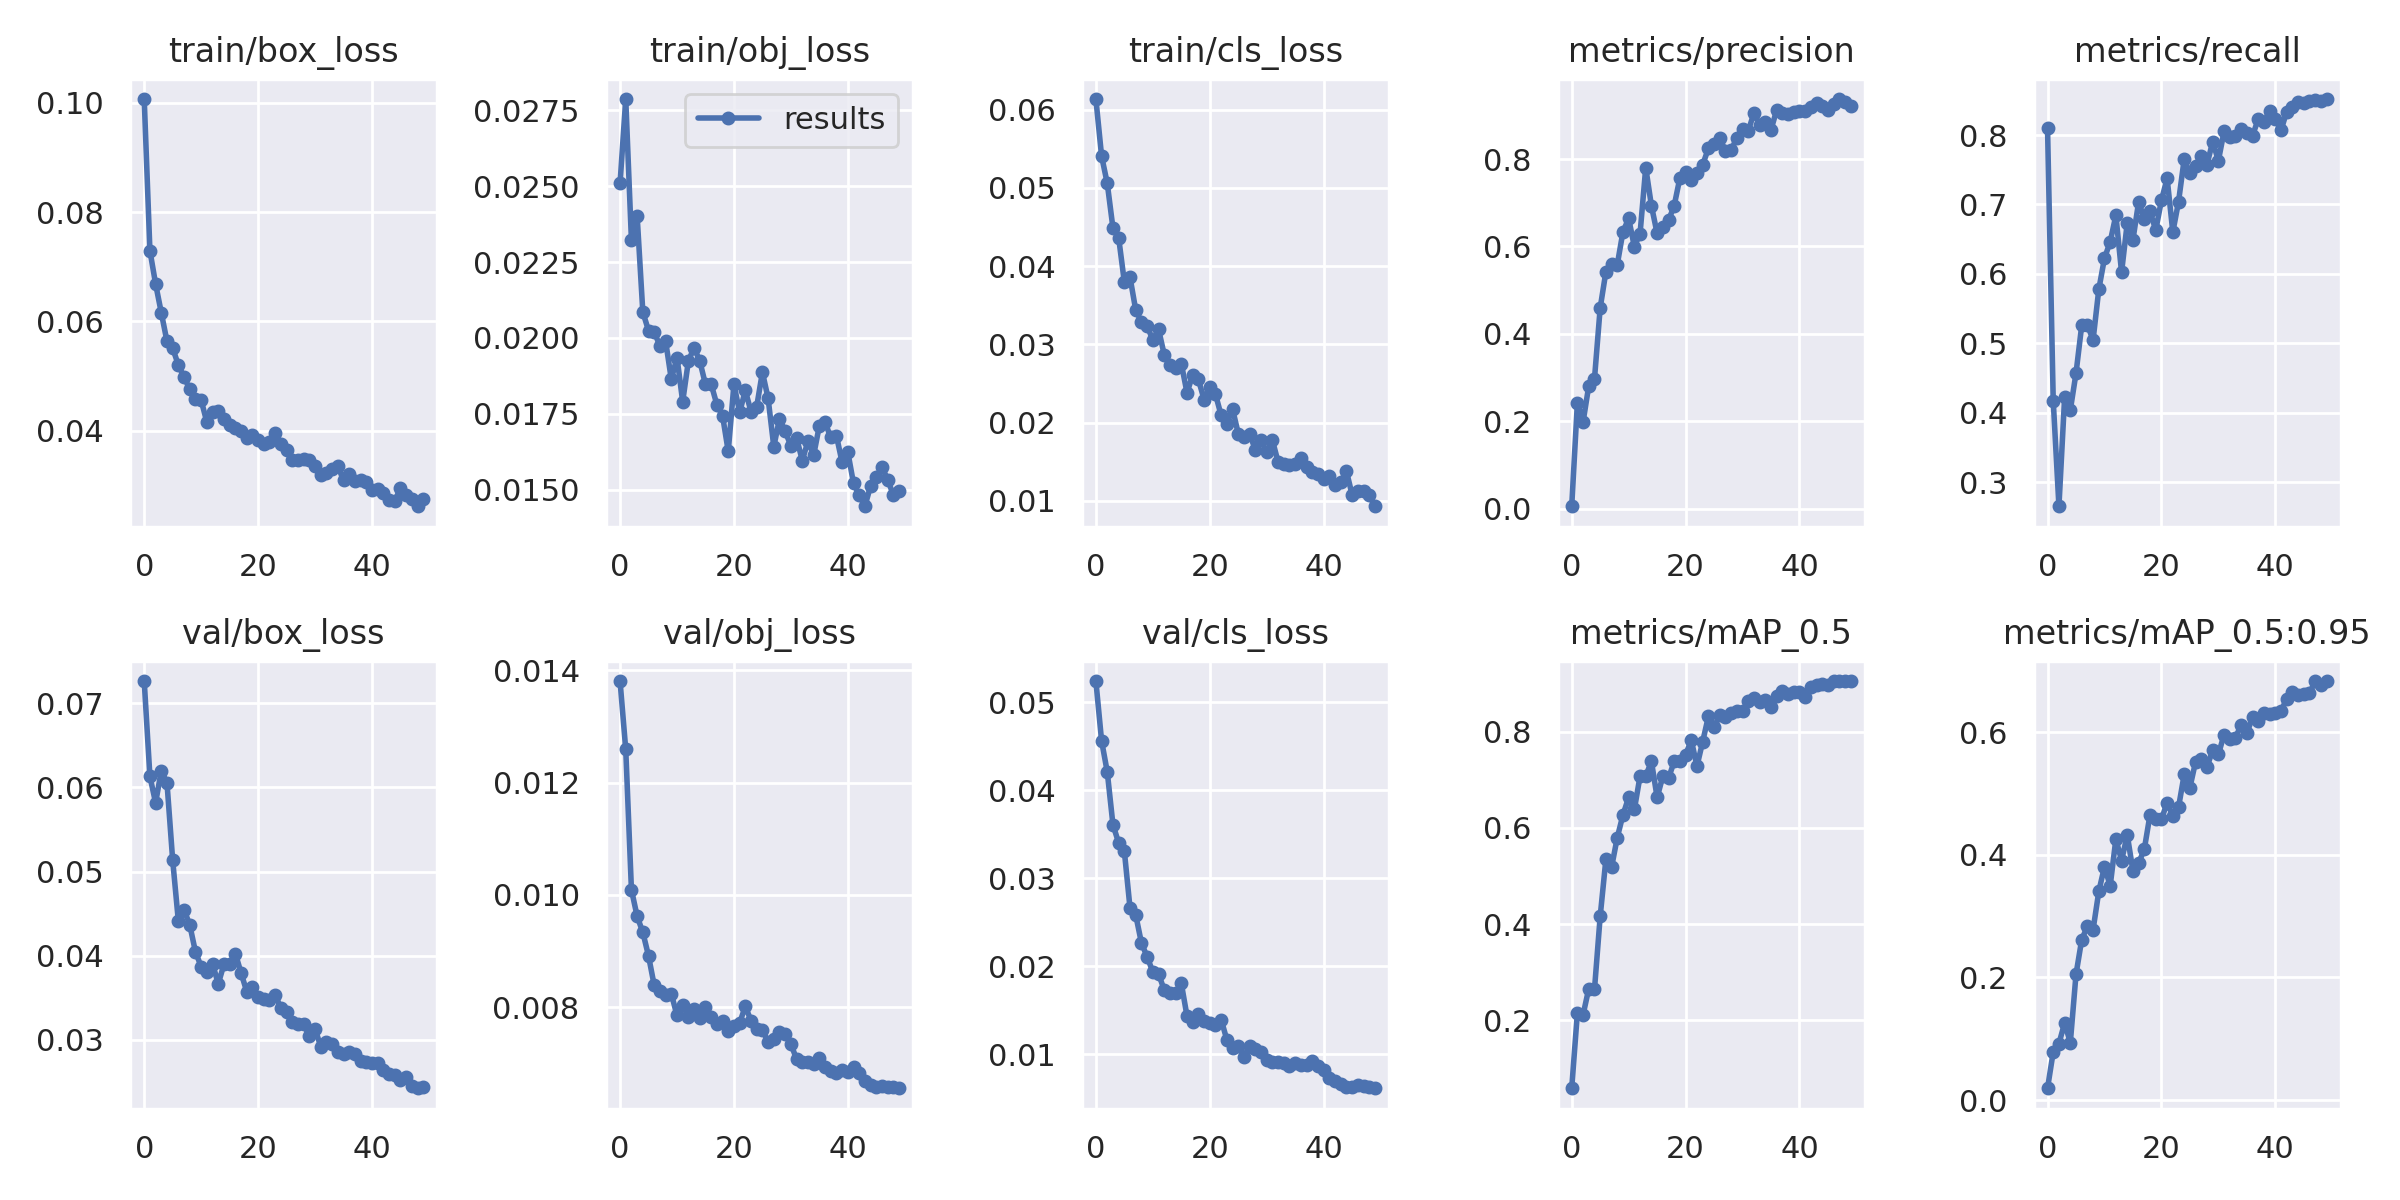

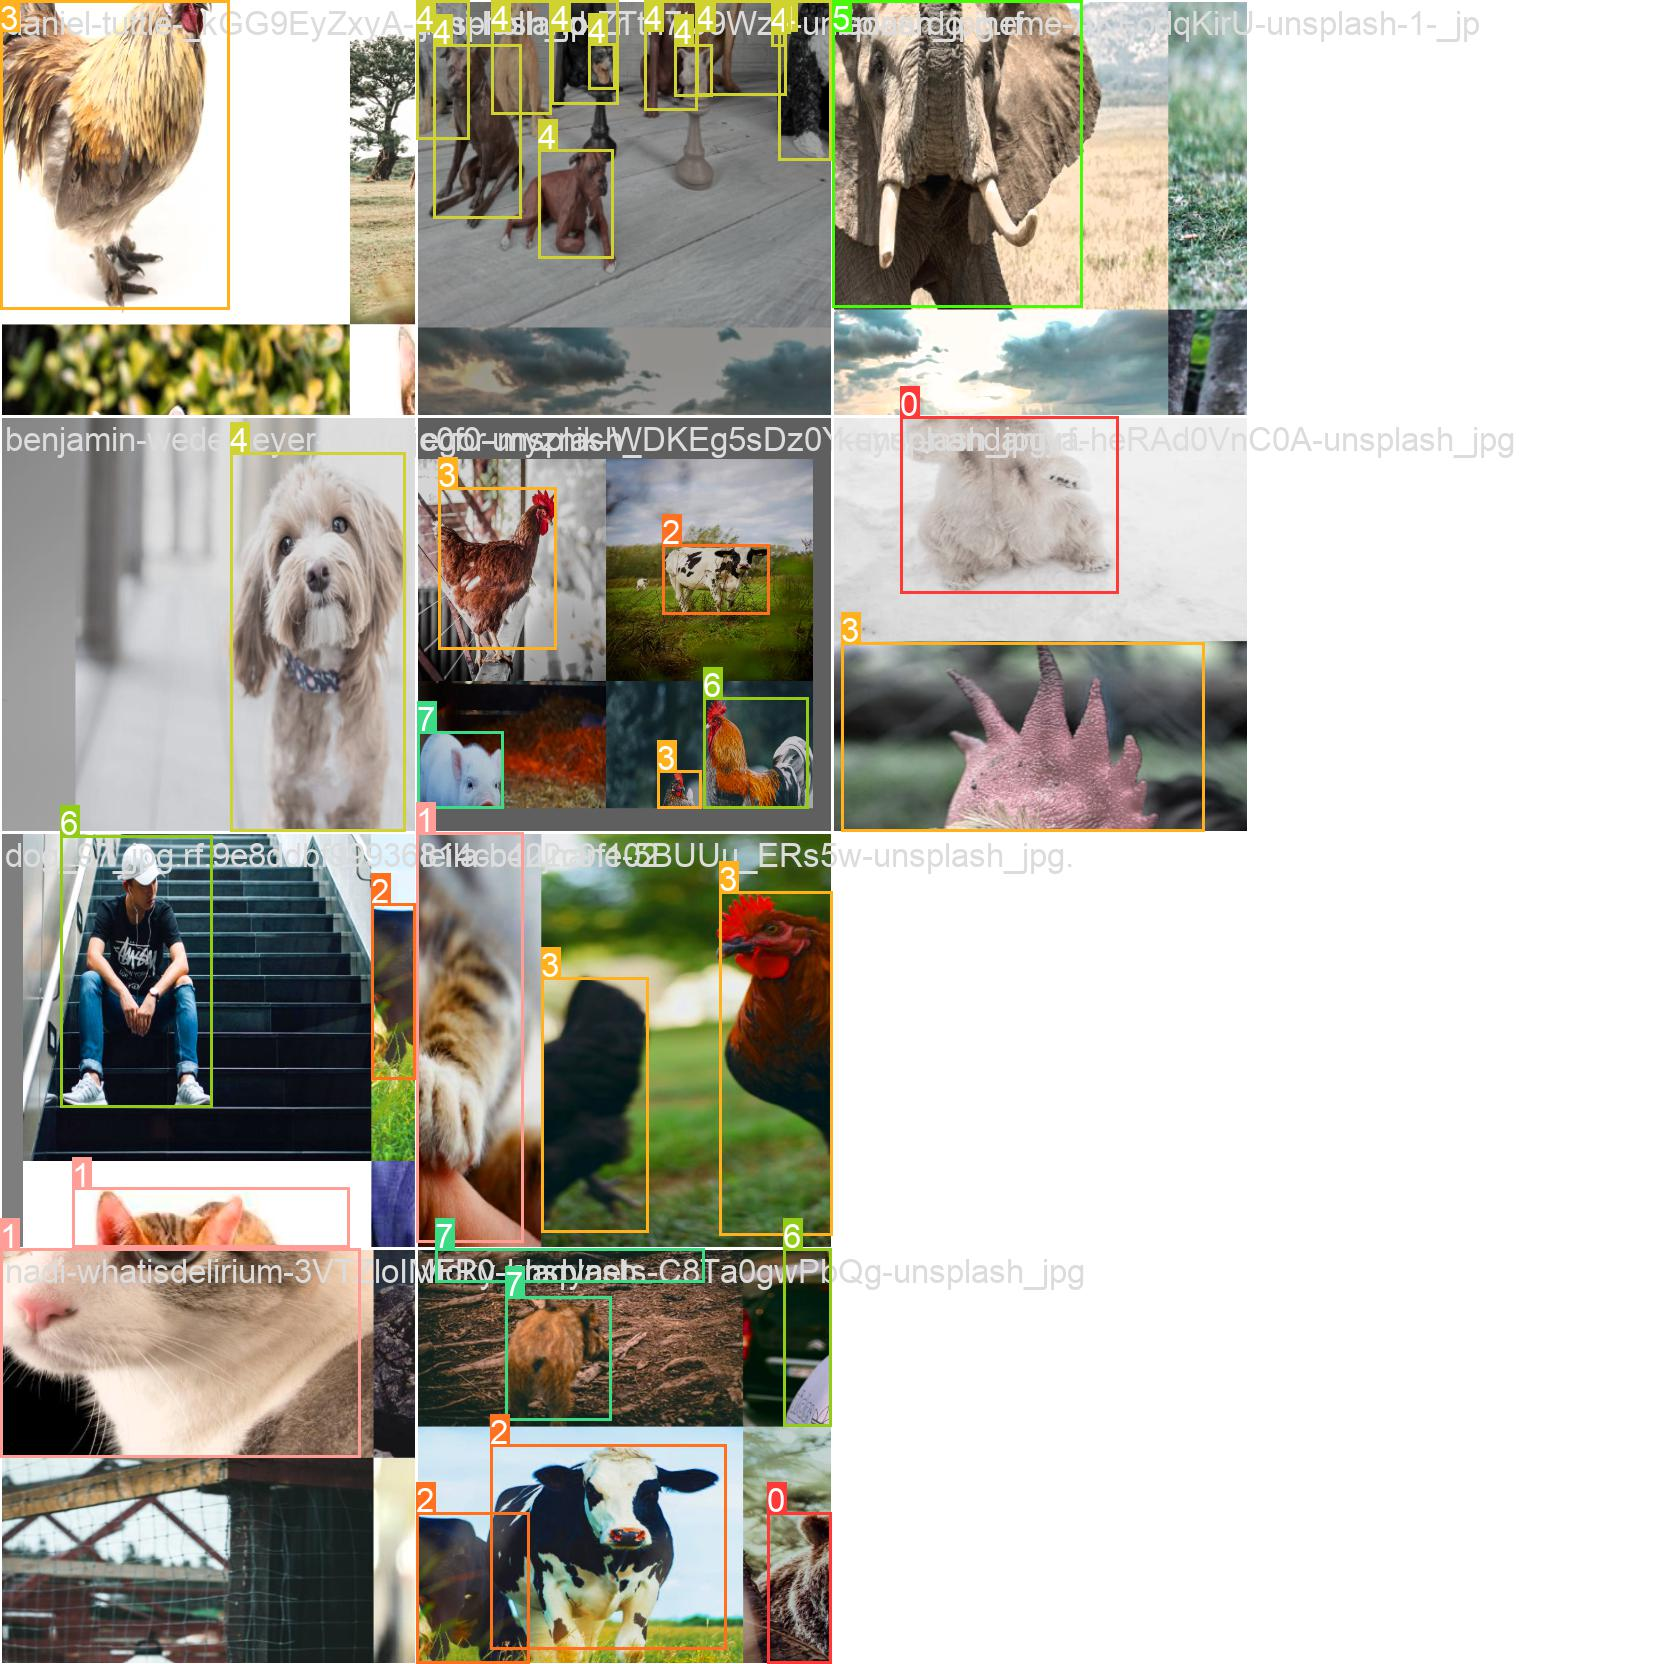

In [19]:
# Display Train 3 inference
display(Image('/content/yolov5/runs/train/exp3/F1_curve.png'))
display(Image('/content/yolov5/runs/train/exp3/results.png'))
display(Image('//content/yolov5/runs/train/exp3/train_batch0.jpg'))


COMMENT

Took 8 minuates to complete the training

mAP = 0.90 or 90%

Recall = 0.85

Precision = 0.94

# Step 8: Test 2
Test the model again using the last train

In [13]:
# Test the model again using same test images with the runs/train/exp3 path
!python detect.py --weights runs/train/exp3/weights/best.pt --img 416 --conf 0.1 --source /content/yolov5/21322100-1/test/images

detect: weights=['runs/train/exp3/weights/best.pt'], source=/content/yolov5/21322100-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-71-gc442a2e Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
image 1/80 /content/yolov5/21322100-1/test/images/20221023_140514_jpg.rf.8b5bf371e23b3fe491ce05f48b662d27.jpg: 416x416 3 Persons, 8.2ms
image 2/80 /content/yolov5/21322100-1/test/images/alexander-krivitskiy-tSX6E9UextA-unsplash_jpg.rf.cf87c8c0f5d7066f99d4f3a0d0bb48ae.jpg: 416x416 1 Person, 8.2ms
image 3/80 /content/yolov5/2132

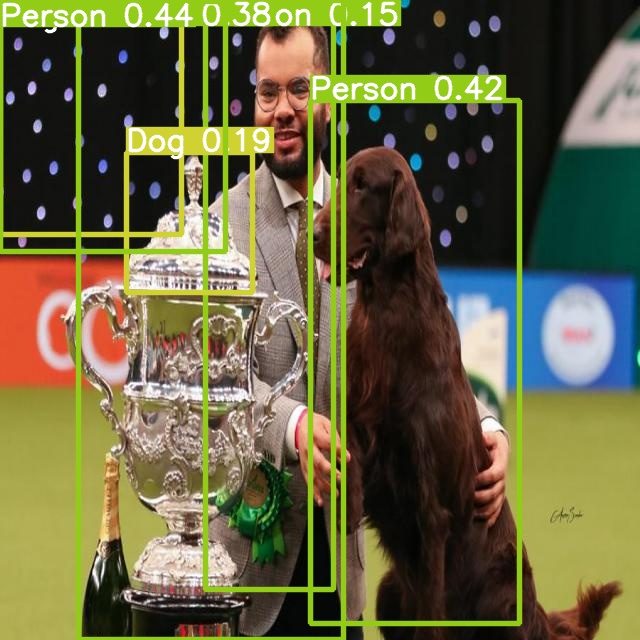

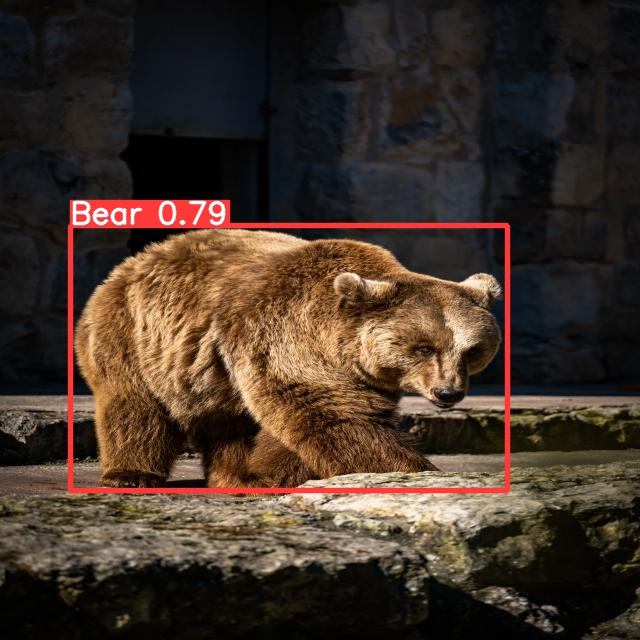

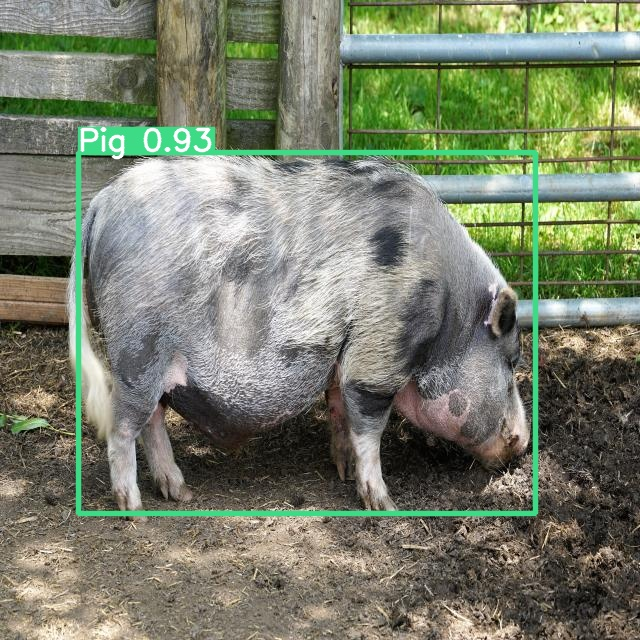

In [23]:
# Display Test 2 inference
display(Image('//content/yolov5/runs/detect/exp3/dog_54_jpg.rf.1b3a36fc8f1cef43cbfb1ebcfae0b392.jpg'))
display(Image('/content/yolov5/runs/detect/exp3/sinval-carvalho-jTnSTGeXvNs-unsplash_jpg.rf.2a61b4c6784e6af5278e5cfbb04ce5f6.jpg'))
display(Image('/content/yolov5/runs/detect/exp3/vito-natale-avMIDf1WPCg-unsplash_jpg.rf.7a7c9682ca2533f20e353c4168c72f95.jpg'))

COMMENT

Detection of image classifcation is noticeably good but with some misclassifcation spotted.

# Step 9: Train 3
Increasing the epoch size to 70 and maintaing the batch size to be 10

In [14]:
# Training path 
!python train.py --img 416 --batch 10 --epochs 70 --data /content/yolov5/21322100-1/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/21322100-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=70, batch_size=10, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-71-gc442a2e Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015,

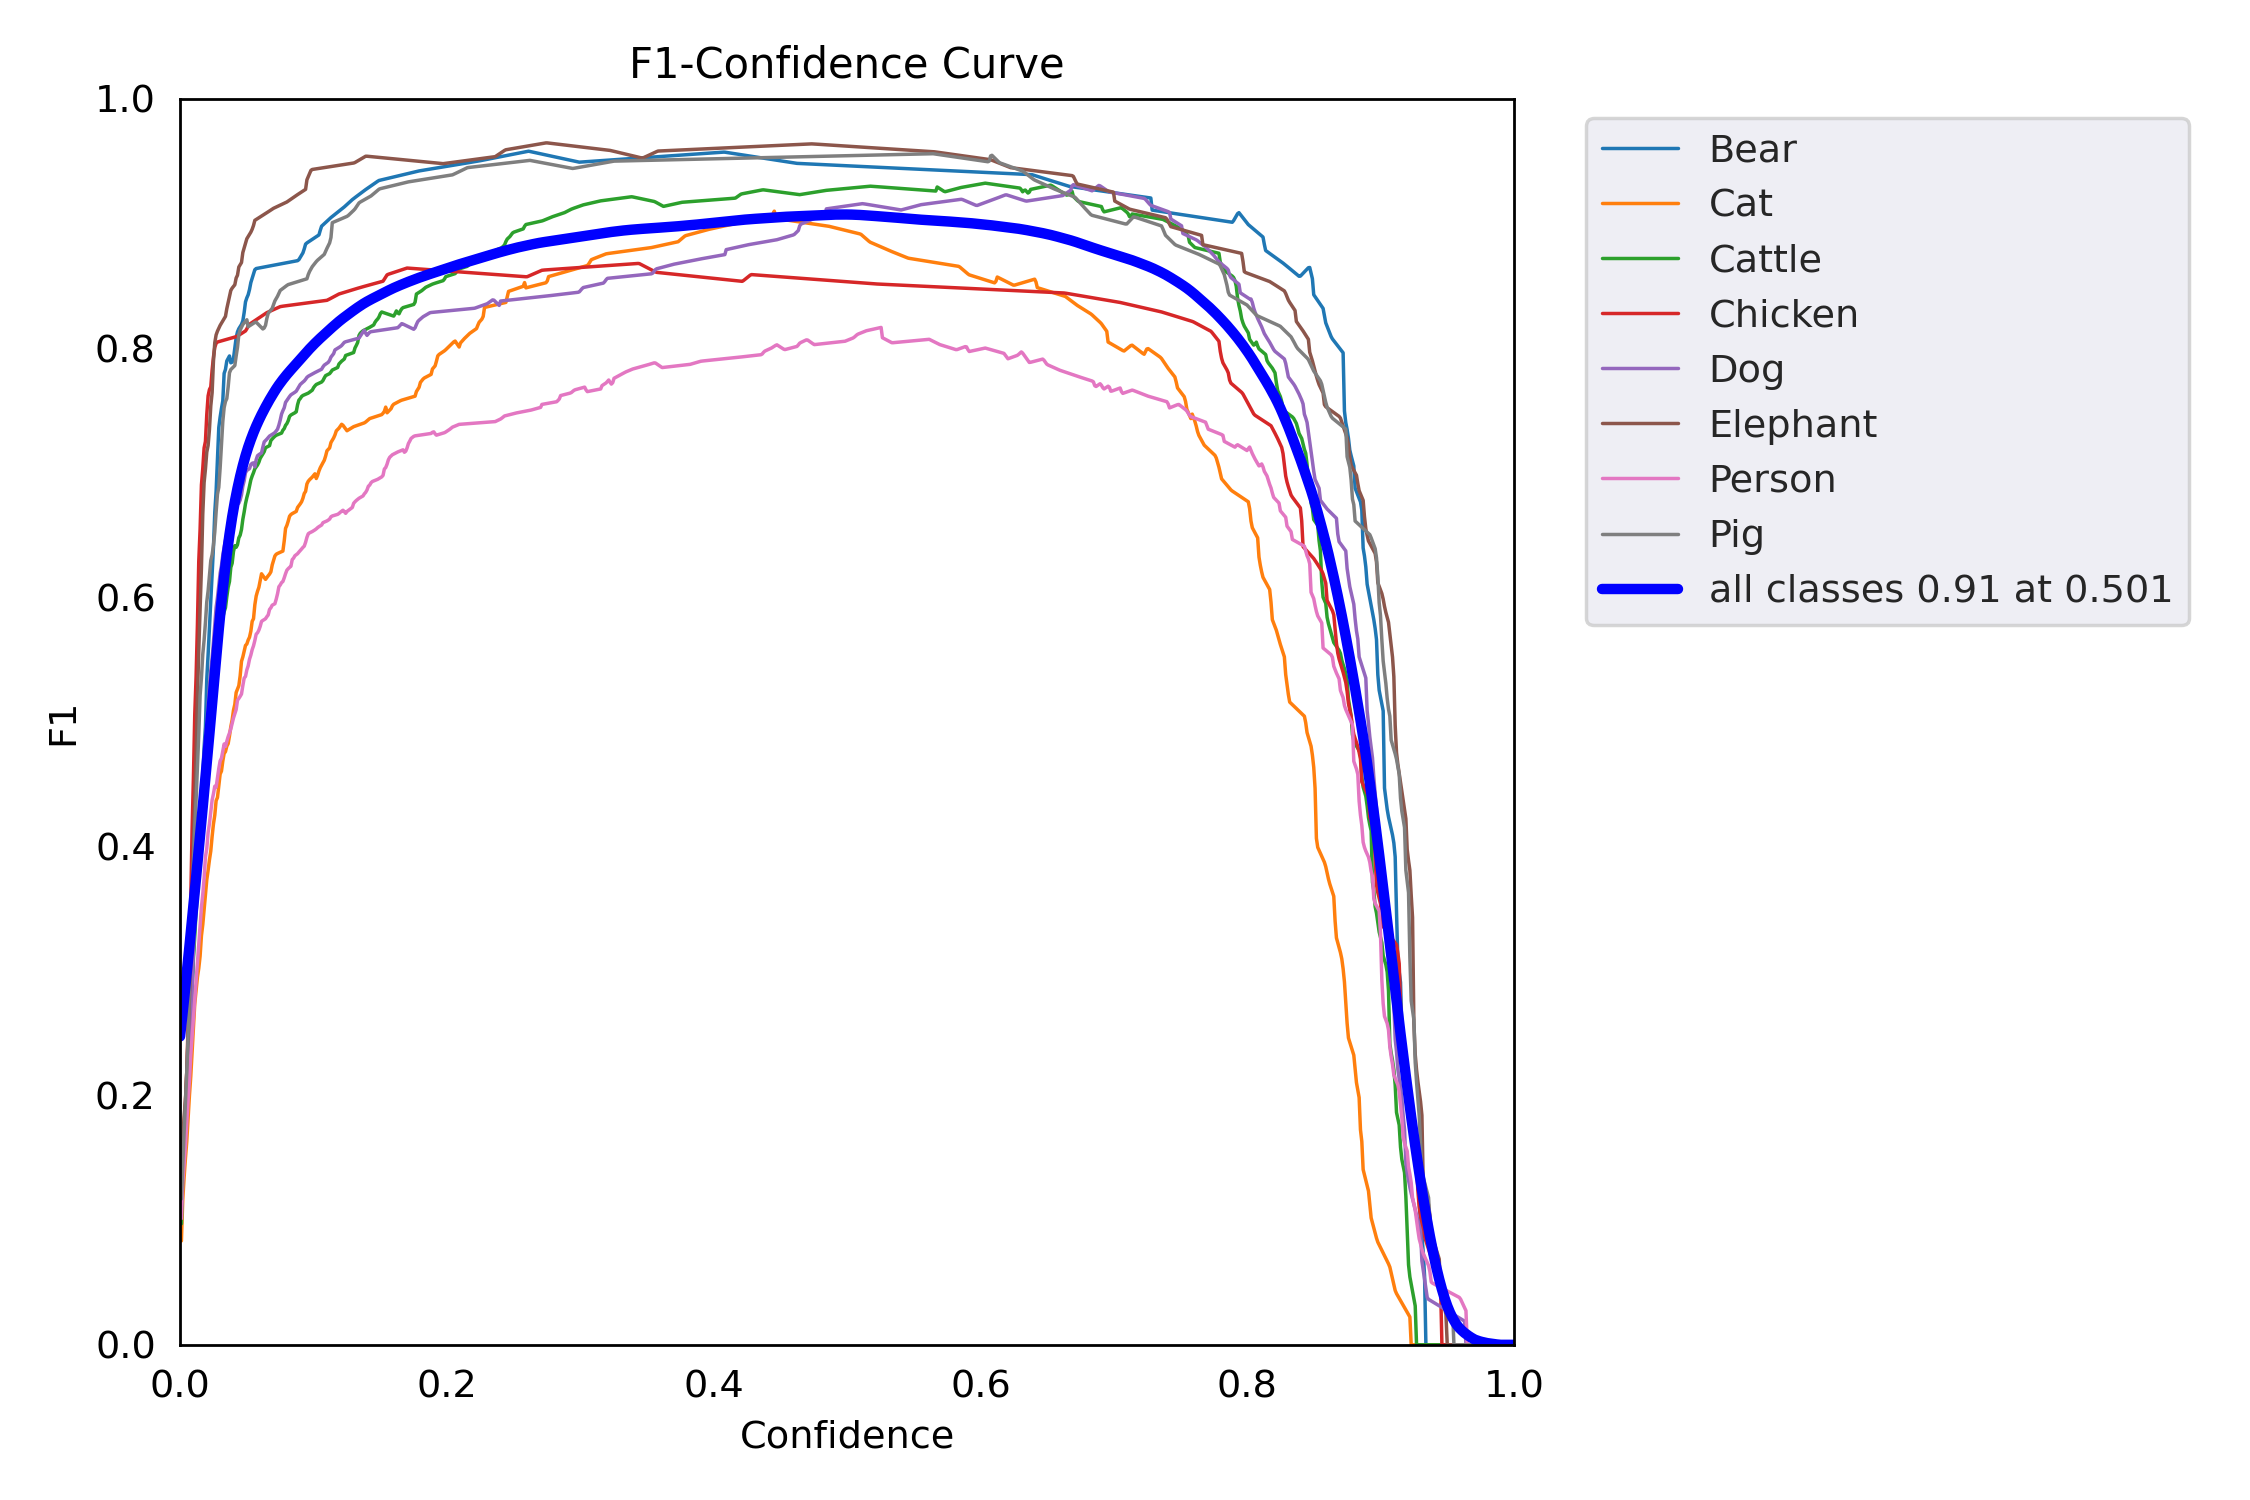

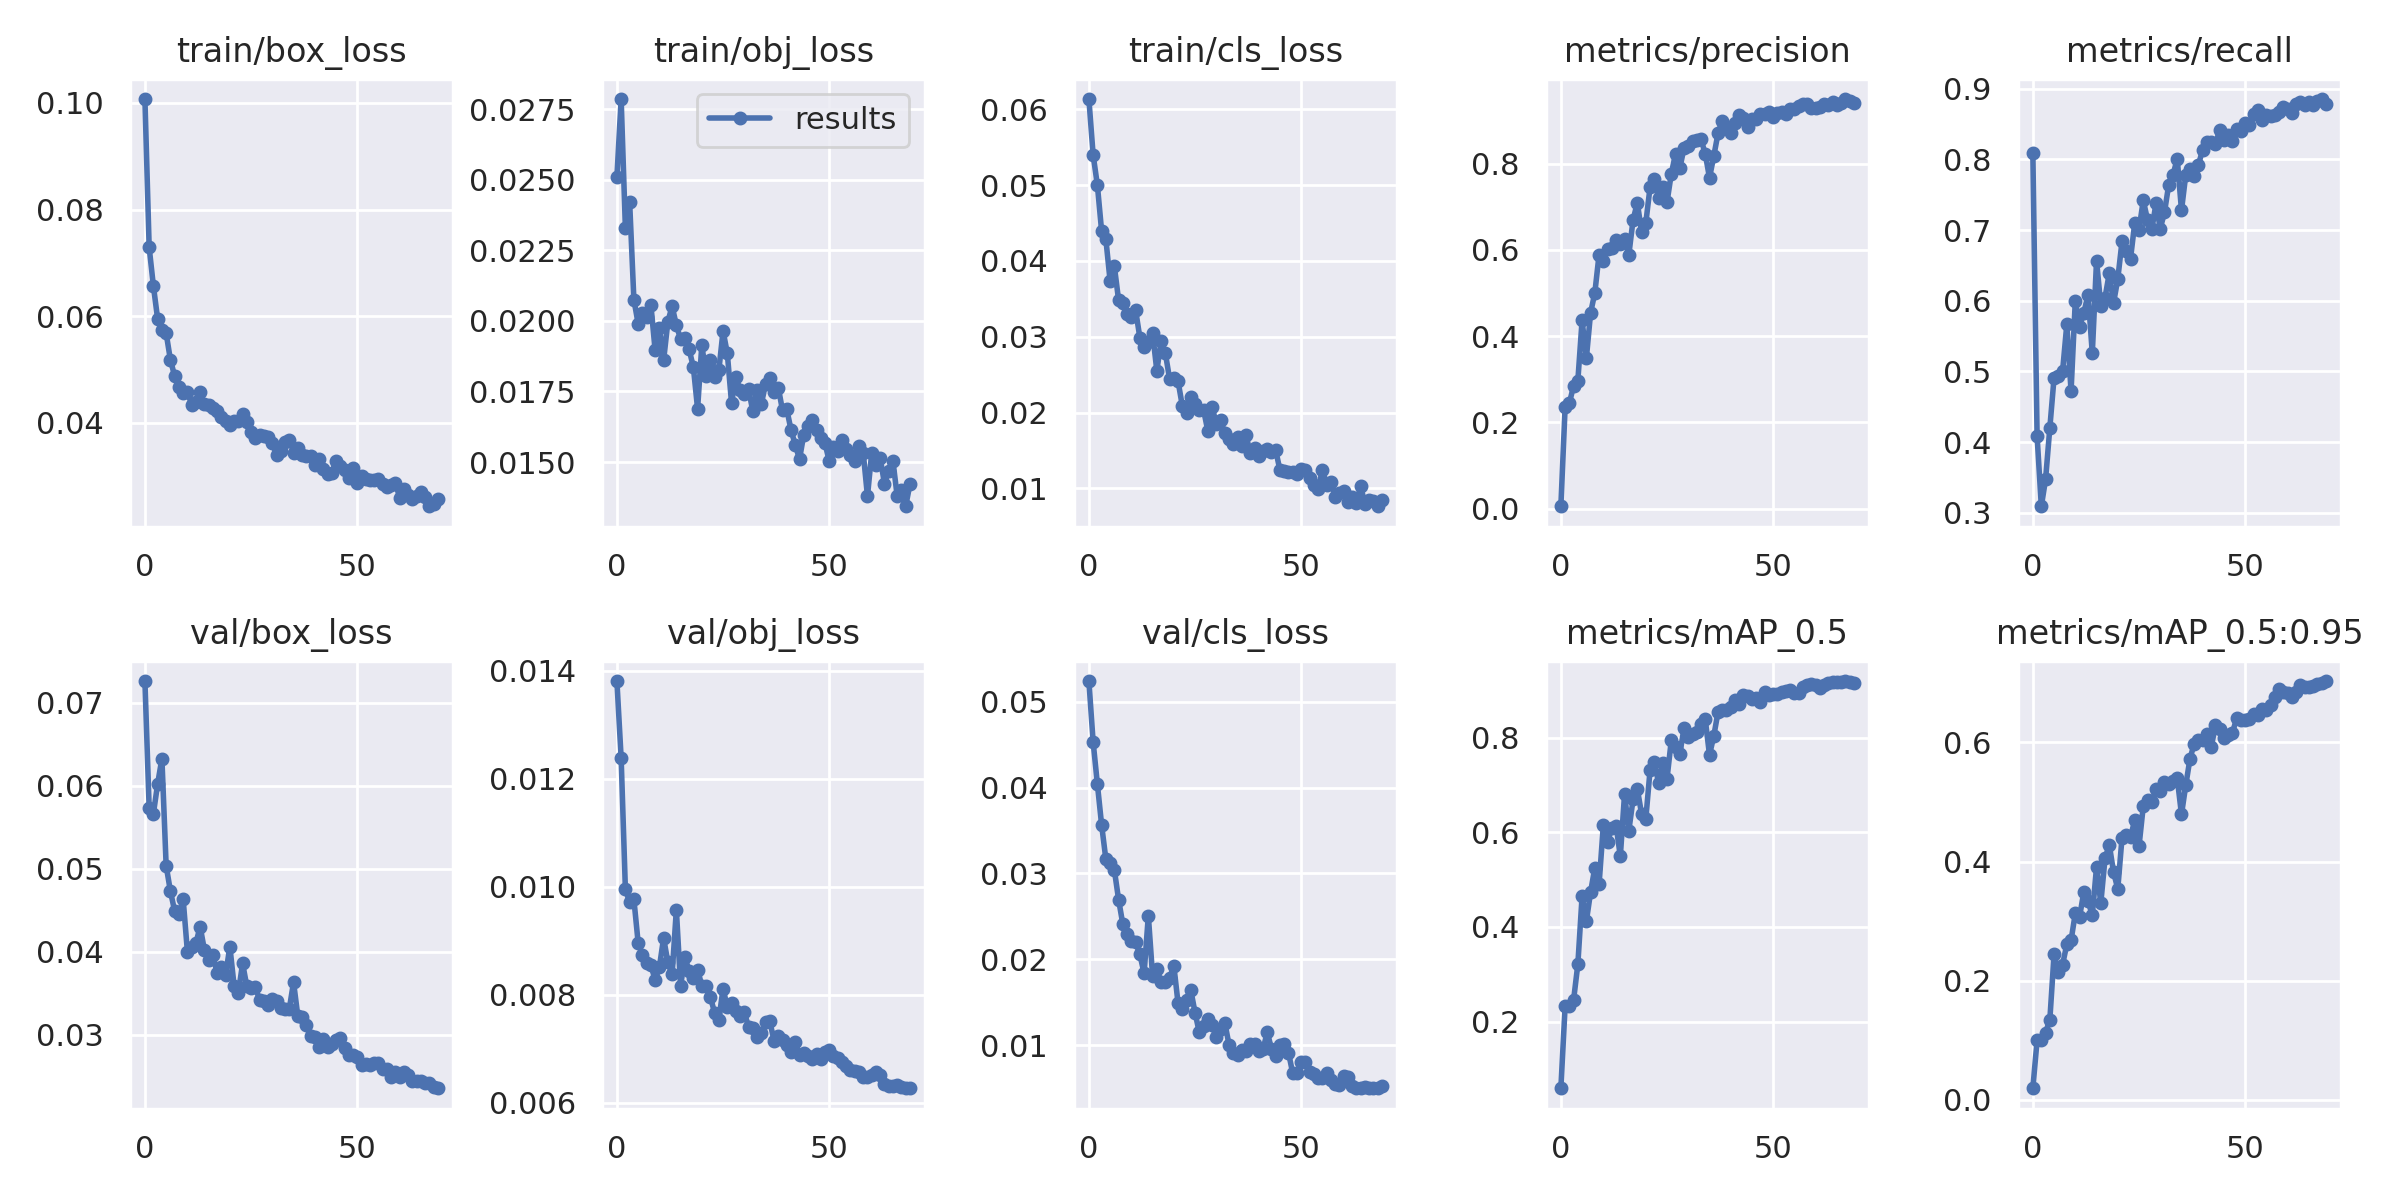

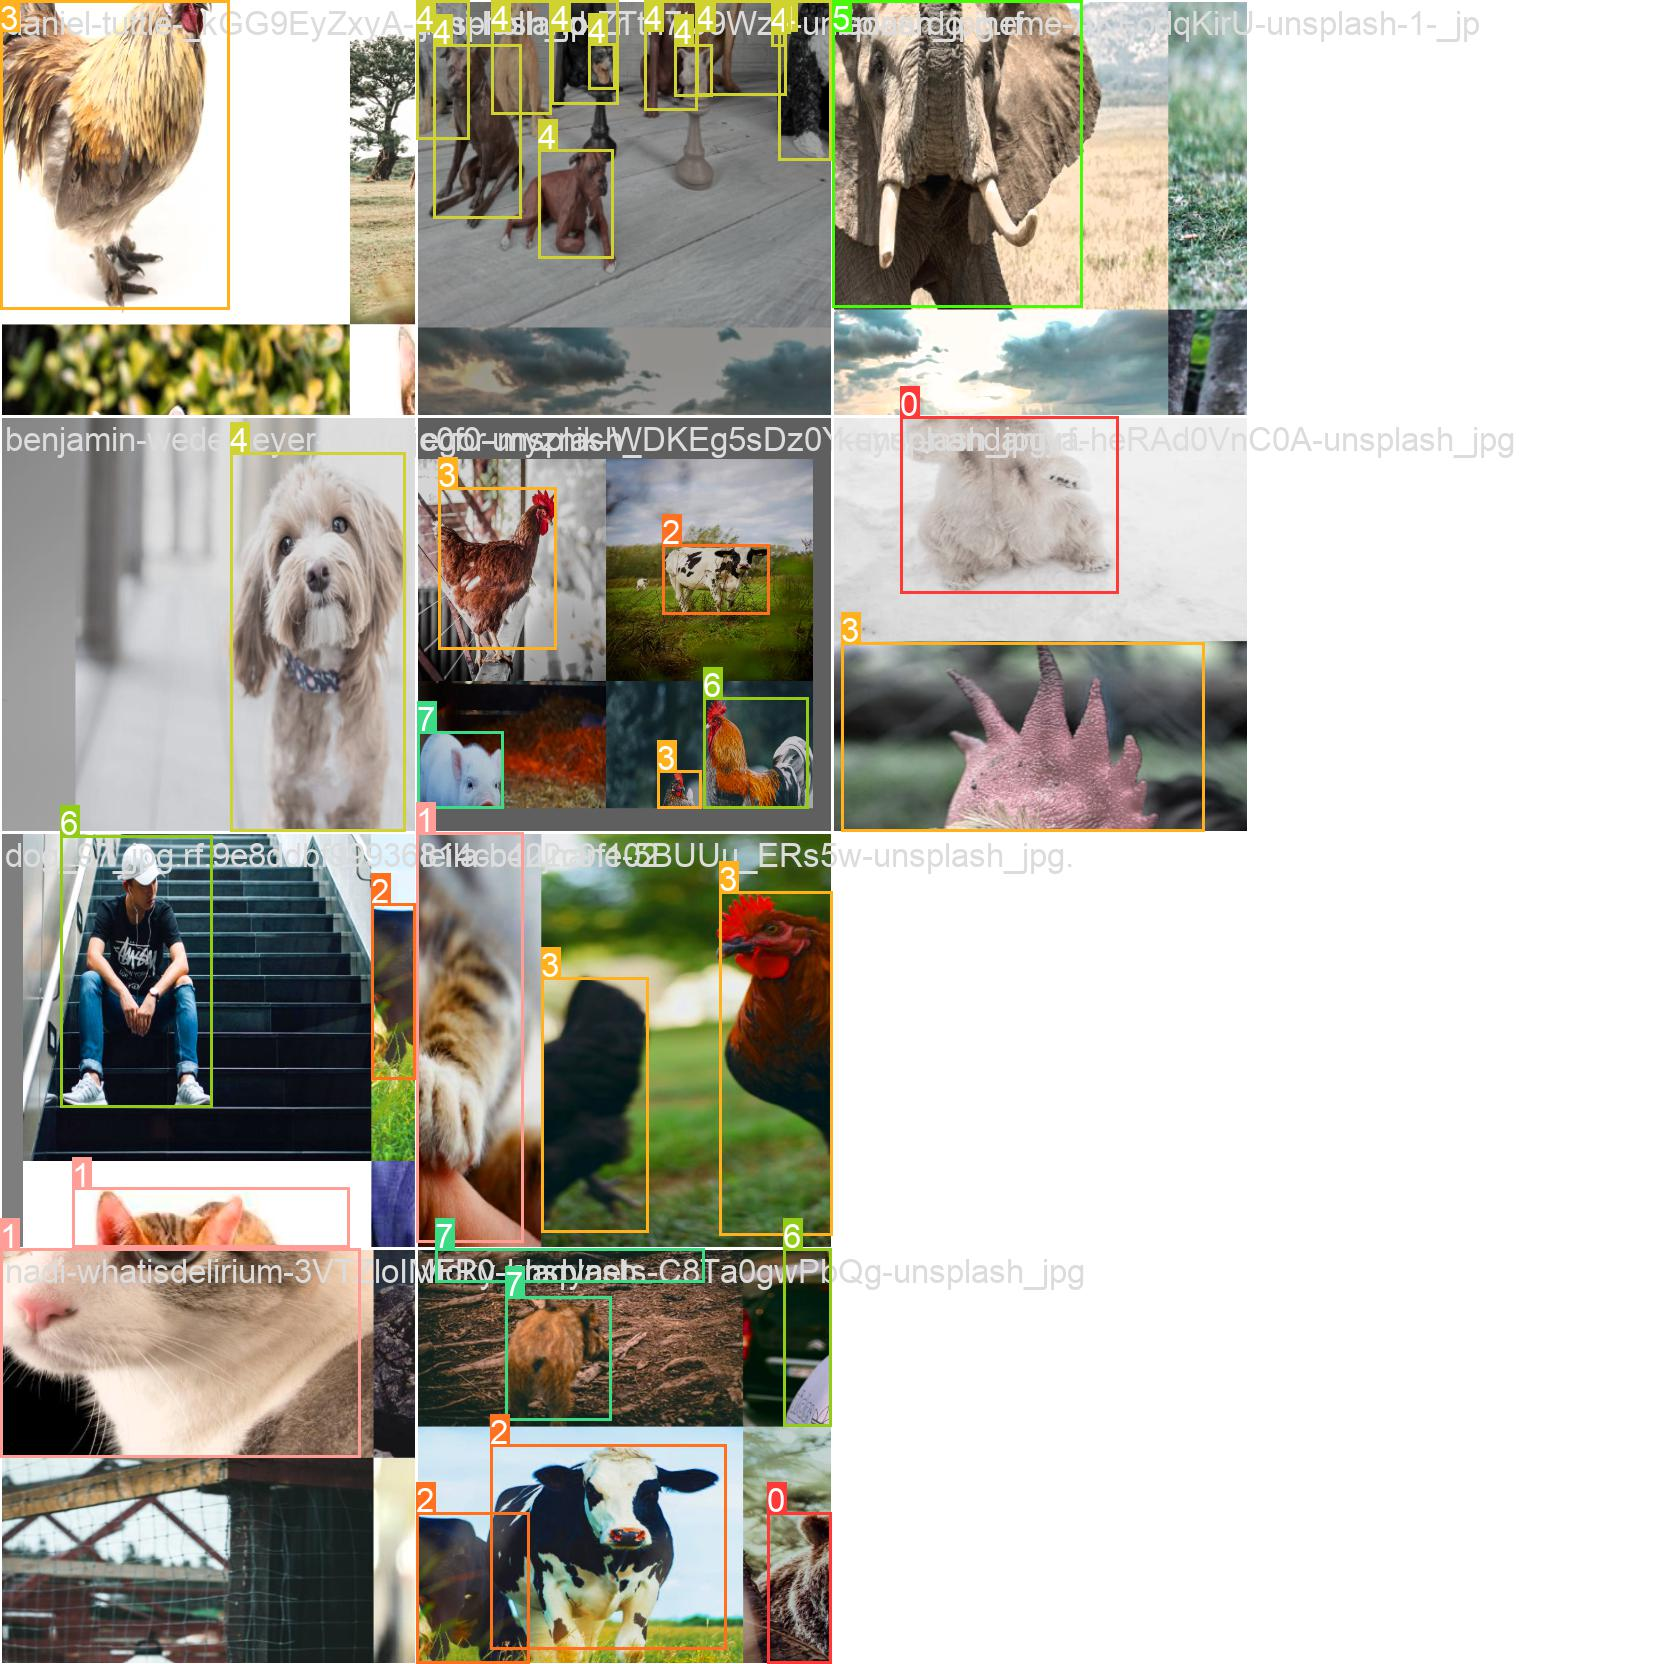

In [20]:
# Display Train 3 inference
display(Image('/content/yolov5/runs/train/exp4/F1_curve.png'))
display(Image('/content/yolov5/runs/train/exp4/results.png'))
display(Image('//content/yolov5/runs/train/exp4/train_batch0.jpg'))

COMMENT

Took 11 minuates to complete the training

mAP = 0.91 or 91%

Recall = 0.88

Precision = 0.94

# Step 10: Test 3
Test the train 3 using same test images 

In [21]:
# Using "exp4"
!python detect.py --weights runs/train/exp4/weights/best.pt --img 416 --conf 0.1 --source /content/yolov5/21322100-1/test/images

detect: weights=['runs/train/exp4/weights/best.pt'], source=/content/yolov5/21322100-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-71-gc442a2e Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
image 1/80 /content/yolov5/21322100-1/test/images/20221023_140514_jpg.rf.8b5bf371e23b3fe491ce05f48b662d27.jpg: 416x416 3 Persons, 8.2ms
image 2/80 /content/yolov5/21322100-1/test/images/alexander-krivitskiy-tSX6E9UextA-unsplash_jpg.rf.cf87c8c0f5d7066f99d4f3a0d0bb48ae.jpg: 416x416 1 Cat, 8.2ms
image 3/80 /content/yolov5/2132210

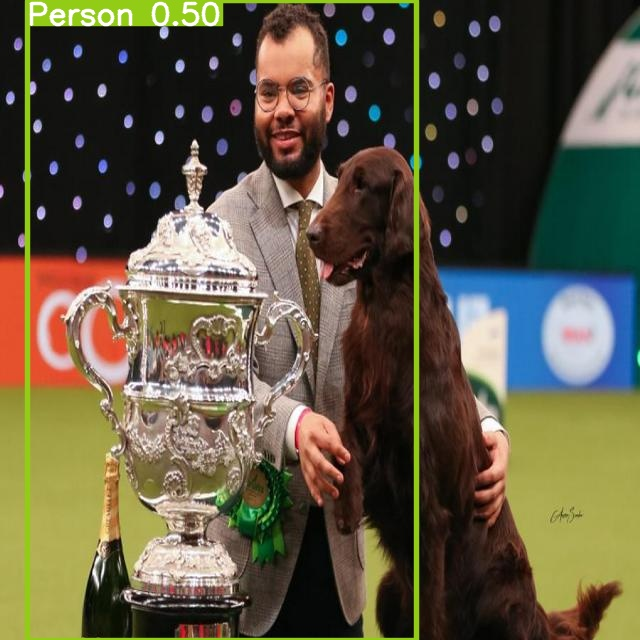

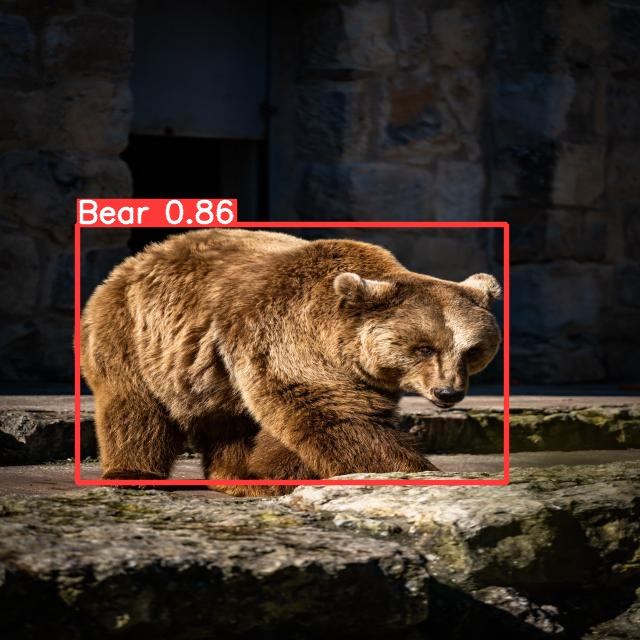

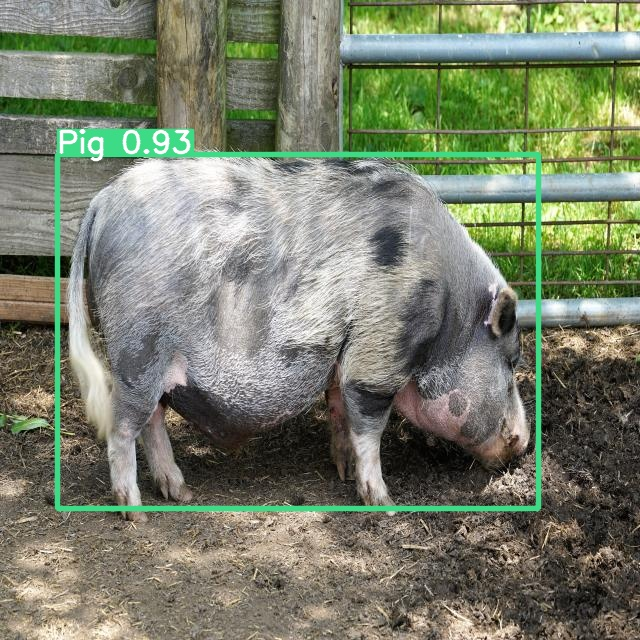

In [22]:
# Display Test 3 inference
display(Image('//content/yolov5/runs/detect/exp4/dog_54_jpg.rf.1b3a36fc8f1cef43cbfb1ebcfae0b392.jpg'))
display(Image('/content/yolov5/runs/detect/exp4/sinval-carvalho-jTnSTGeXvNs-unsplash_jpg.rf.2a61b4c6784e6af5278e5cfbb04ce5f6.jpg'))
display(Image('/content/yolov5/runs/detect/exp4/vito-natale-avMIDf1WPCg-unsplash_jpg.rf.7a7c9682ca2533f20e353c4168c72f95.jpg'))

Comments:

Image classification were fairly correct but with some noticeable misclassification 

5.	DISCUSSION

In this study, a detection system was created that can identify some farm animal images using the YOLOv5 single-stage object architecture. The data was curated with the help of google, annotated, trained, and tested the system on Google Colab using Tesla. The system achieved a maximum mAP value detection of 91%. Additionally, the system successfully recognized various farm animals. The accuracy of the model could be improved by increasing the dataset size through the addition of new images and data augmentation techniques.


6.	LITERATURE

i.	Ultralytics. (2021): Train Custom Data. Retrieved October 4, 2021, from Ultralytics Github website: https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data

ii.	Redmon, J., Divvala, S., Girshick, R., & Farhadi, A. (2016): You only look once: Unified, real-time object detection. 2016 IEEE Conference on Computer Vision and Pattern Recognition (CVPR). IEEE. Retrieved from http://dx.doi.org/10.1109/cvpr.2016.91
